## **Libraries**

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import cm
import math
from matplotlib.patches import Ellipse

## **Initial Conditions**

In [2]:
T = 200

delta_t = 1

Q = np.zeros((4, 4),float)
np.fill_diagonal(Q, [1,1,1e-4,1e-4])

A = np.zeros((4,4),float)
np.fill_diagonal(A,1)
A[0][2]=delta_t
A[1][3]=delta_t

B = np.zeros((4,2),float)
B[0][0]=delta_t
B[1][1]=delta_t
B[2][0]=1
B[3][1]=1

C = np.zeros((2,4),float)
C[0][0] = 1
C[1][1] = 1

R = np.zeros((2, 2),float)
np.fill_diagonal(R, 100)

## **Plot functions**

In [3]:
def plot_2_continuous(path1,path2,label1,label2):

  x = []
  y = []
  for i in range(len(path1)):
    x.append(path1[i][0])
    y.append(path1[i][1])
  plt.plot(x,y,label = label1)

  x = []
  y = []
  for i in range(len(path2)):
    x.append(path2[i][0])
    y.append(path2[i][1])

  plt.plot(x,y,label = label2)
  plt.xlabel("x (meter)")
  plt.ylabel("y (meter)")
  plt.legend()
  plt.rcParams["figure.figsize"] = (5,5)
  plt.show()

In [4]:
def plot_3_continuous(path1,path2,path3,label1,label2,label3):
 
  x = []
  y = []
  for i in range(len(path2)):
    x.append(path2[i][0])
    y.append(path2[i][1])
  plt.plot(x,y,c = 'pink',label = label2)

  x = []
  y = []
  for i in range(len(path1)):
    x.append(path1[i][0])
    y.append(path1[i][1])
  plt.plot(x,y,c = 'blue',label = label1)

  x = []
  y = []
  for i in range(len(path3)):
    x.append(path3[i][0])
    y.append(path3[i][1])
  plt.plot(x,y,c = 'green',label = 'Estimated')
  plt.legend()
  plt.rcParams["figure.figsize"] = (10,10)
  plt.xlabel("x (meter)")
  plt.ylabel("y (meter)")

  plt.show()  

In [5]:
def plot_trajectory(path,label1):
  x = []
  y = []
  for i in range(len(path)):
    x.append(path[i][0])
    y.append(path[i][1])
  plt.plot(x,y,label = label1)
  plt.xlabel("x (meter)")
  plt.ylabel("y (meter)")
  plt.legend()
  plt.show()

In [6]:
def plot_2_trajectory(path1,path2,label1,label2):
  x = []
  y = []
  for i in range(len(path1)):
    if (i%20 == 0):
      x.append(path1[i][0])
      y.append(path1[i][1])
  plt.scatter(x,y,label = label1)
  plt.plot(x,y,linestyle = 'dashed')
  x = []
  y = []
  for i in range(len(path2)):
    if (label2 == "Observed"):
      if ((i+1)%20 == 0):
        x.append(path2[i][0])
        y.append(path2[i][1])
    else:
      if (i%20 == 0):
        x.append(path2[i][0])
        y.append(path2[i][1])
    
  plt.scatter(x,y,label = label2)
  plt.plot(x,y,linestyle = 'dashed')
  plt.xlabel("x (meter)")
  plt.ylabel("y (meter)")
  plt.legend()
  plt.rcParams["figure.figsize"] = (15,15)
  plt.show()

In [7]:
def plot_3_trajectory(path1,path2,path3, mu_s, sigma_s):
 
  for i in range (0,201,20):

    mean = mu_s[i]
    cov = sigma_s[i]
    cov = cov[:2,:2]

    h = mean[0][0]
    k = mean[1][0]   
    eigval, eigvec  = np.linalg.eig(cov)
    sigma_x = eigval[0]
    sigma_y = eigval[1]
    eigvec_x = eigvec[:,0]
    beta = 90
    if eigvec_x[0] != 0:
      beta = np.degrees((np.arctan(eigvec_x[1]/eigvec_x[0])))
    ellipse = Ellipse((h,k), 2*sigma_x, 2*sigma_y, angle = beta, facecolor='none', edgecolor='tab:blue' )
    ax = plt.subplot(aspect='equal')
    ax.add_patch(ellipse)
    # ax.set_xlim([50,100])
    # ax.set_ylim([47.5,50])
  
  x = []
  y = []
  for i in range(len(path1)):
    if (i%20 == 0):
      x.append(path1[i][0])
      y.append(path1[i][1])
  plt.scatter(x,y,c = 'blue',label = 'Actual')
  plt.plot(x,y,linestyle = 'dotted',c = 'blue')
  x = []
  y = []
  print(len(path2))
  for i in range(len(path2)):
    if ((i+1)%20 == 0):
      x.append(path2[i][0])
      y.append(path2[i][1])
  plt.scatter(x,y,c = 'green',label = 'Observed')
  plt.plot(x,y,linestyle = 'dotted',c = 'green')
  x = []
  y = []
  for i in range(len(path3)):
    if (i%20 == 0):
      x.append(path3[i][0])
      y.append(path3[i][1])
  plt.scatter(x,y,c = 'orange',label = 'Estimated')
  plt.plot(x,y,linestyle = 'dotted',c = 'orange')
  plt.legend()
  plt.rcParams["figure.figsize"] = (15,15)
  plt.xlabel("x (meter)")
  plt.ylabel("y (meter)")

  plt.show()  

In [8]:
def euclidean_distance (x1,y1,x2,y2):
  return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def euclidean_plot(path1,path2):
  euclidean_error = []
  for i in range (0,T+1):
    euclidean_error.append(euclidean_distance(path1[i][0], path1[i][1], path2[i][0], path2[i][1]))
  plt.plot(euclidean_error)
  plt.ylabel("Error")
  plt.xlabel("Time")
  plt.show()

## **Kalman filter function**

In [9]:
def kalman_filter(update_type, old_mu, old_sigma, u, z, A, B, C,R,Q):

  if update_type == "motion_model":
    
    new_mu = np.dot(A,old_mu)+np.dot(B,u)
    new_sigma = np.dot(np.dot(A,old_sigma),A.T)+Q

  else:

    # Kalman Gain
    K = np.dot(np.dot(old_sigma,C.T),np.linalg.inv(np.dot(np.dot(C,old_sigma),C.T)+R))

    new_mu = old_mu + np.dot(K,z-np.dot(C,old_mu))
    
    I = np.identity(K.shape[0])
    new_sigma = np.dot(I - np.dot(K,C),old_sigma)

  return new_mu, new_sigma

## **Part a**
Generate a trajectory, and plot actual and observed trajectory

In [10]:
def sample_gaussian(mu, sigma):
  sample = np.random.multivariate_normal(mu.flatten(), sigma)
  return sample

In [11]:
def generate_trajectory(A, B, Q, X, U, T):

# gives 200 points of the generated trajectory, from t = 1 to t = 200

  path = []
  path.append(X.flatten().tolist())
  X_new = copy.deepcopy(X)

  for i in range(1,T+1):
    
    epsilon = sample_gaussian(np.zeros((4,1),float), Q)
    X_new = np.dot(A,X_new) + np.dot(B,np.array(U[i-1]).reshape(2,1)) + epsilon.reshape((4,1))
    path.append(X_new.flatten().tolist())

  return path


In [12]:
def observe_trajectory(C, R, X, T):

  path = []

  for i in range(1,T+1):
    
    delta = sample_gaussian(np.zeros((2,1),float), R)
    Z = np.dot(C,np.array(X[i]).reshape(4,1)) + delta.reshape((2,1))
    path.append(Z.flatten().tolist())

  return path

In [13]:
X_init = np.array([60,20,2,2]).reshape(4,1)
U = np.zeros((T,2,1),float)
actual_trajectory = generate_trajectory(A, B, Q, X_init, U, T)
observed_trajectory = observe_trajectory(C,R,actual_trajectory,T)

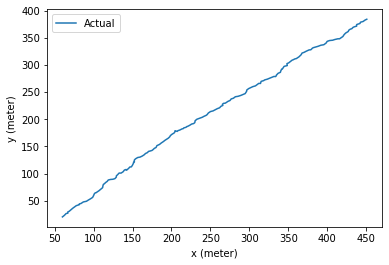

In [14]:
# plot_trajectory(np.delete(actual_trajectory,[2,3],1))
plot_trajectory(actual_trajectory,"Actual")

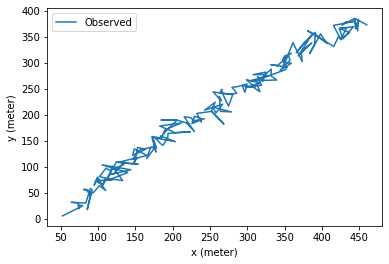

In [15]:
plot_trajectory(observed_trajectory,"Observed")

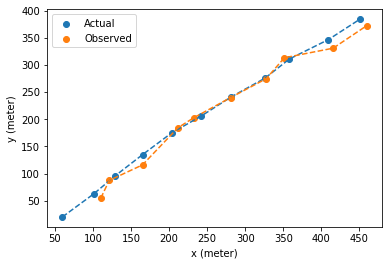

In [16]:
# plot_2_trajectory(np.delete(actual_trajectory,[2,3],1),observed_trajectory,"Actual","Observed")
plot_2_trajectory(actual_trajectory,observed_trajectory,"Actual","Observed")

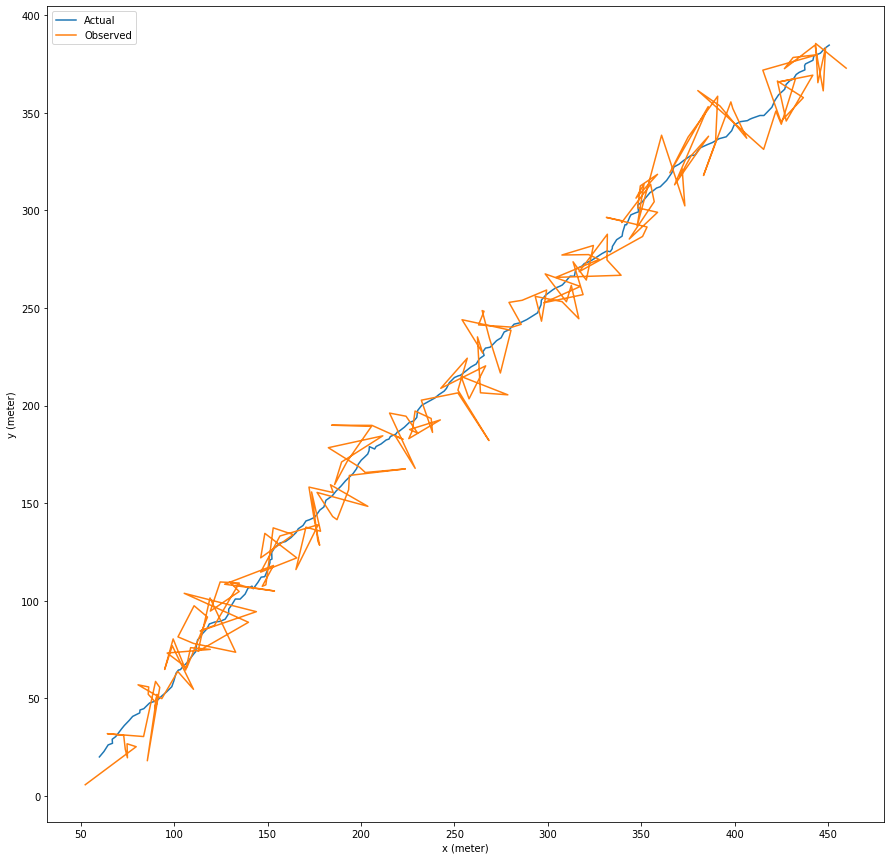

In [17]:
plot_2_continuous(actual_trajectory,observed_trajectory,"Actual","Observed")

# **Part b)**

In [18]:
mu_belief = np.array([10,10,1,1]).reshape(4,1)
sigma_belief = np.zeros((4,4),float)
np.fill_diagonal(sigma_belief, 1e-4)

mu_s = []
sigma_s = []

mu_s.append(mu_belief)
sigma_s.append(sigma_belief)

estimated_trajectory = []
estimated_trajectory.append(mu_belief)

for i in range(1,T+1):
  delta = sample_gaussian(np.zeros((2,1),float), R)
  Z = np.reshape(np.asarray(observed_trajectory[i-1]),(2,1))
  mu_i,sigma_i = kalman_filter("motion_model",mu_s[i-1],sigma_s[i-1],U[i-1],None,A,B,C,R,Q)
  mu_i,sigma_i = kalman_filter("sensor_model",mu_i,sigma_i,U[i-1],Z,A,B,C,R,Q)
  mu_s.append(mu_i)
  sigma_s.append(sigma_i)
  

In [19]:
estimated_trajectory = []
for i in range(0,T+1):
  estimated_trajectory.append(mu_s[i].reshape(4,).tolist())

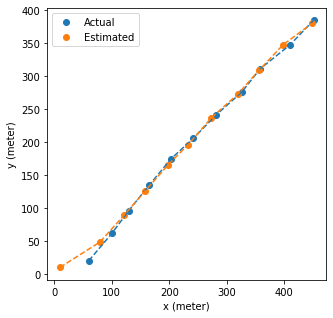

In [20]:
# plot_2_trajectory(np.delete(actual_trajectory,[2,3],1),np.delete(estimated_trajectory,[2,3],1),"Actual","Estimated")
plot_2_trajectory(actual_trajectory,estimated_trajectory,"Actual","Estimated")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


200


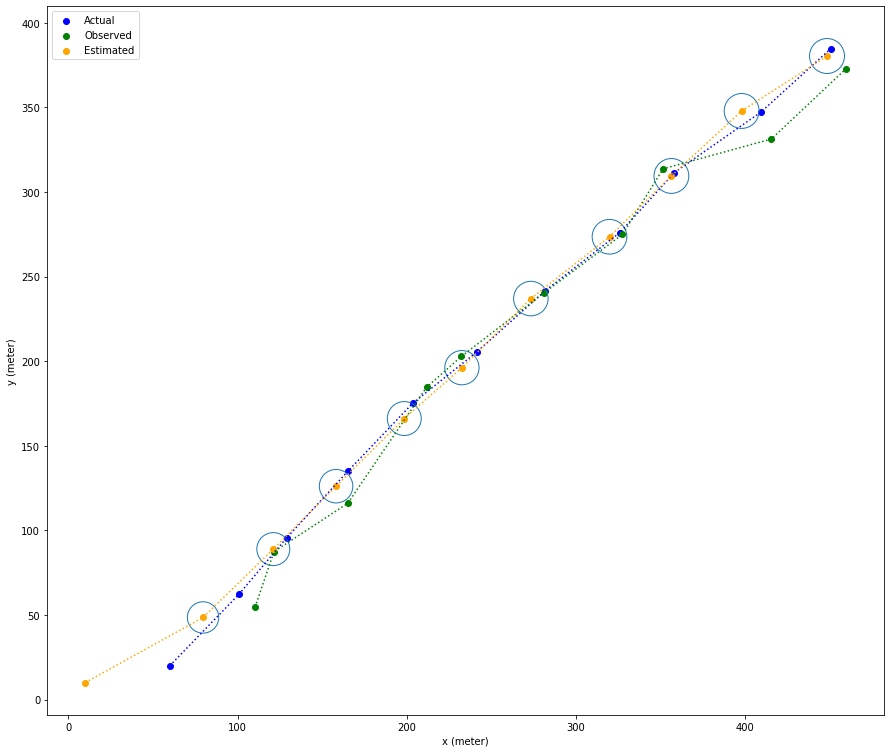

In [21]:
# plot_3_trajectory(np.delete(actual_trajectory,[2,3],1),observed_trajectory,np.delete(estimated_trajectory,[2,3],1),mu_s,sigma_s)
plot_3_trajectory(actual_trajectory,observed_trajectory,estimated_trajectory,mu_s,sigma_s)

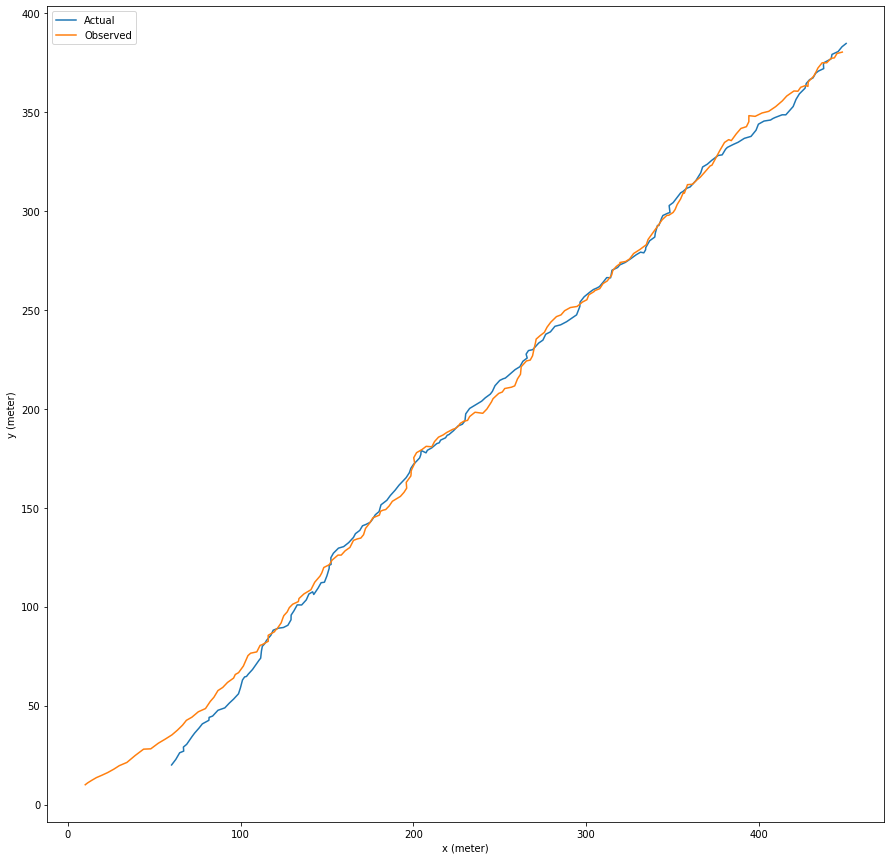

In [22]:
plot_2_continuous(actual_trajectory,estimated_trajectory,"Actual","Observed")

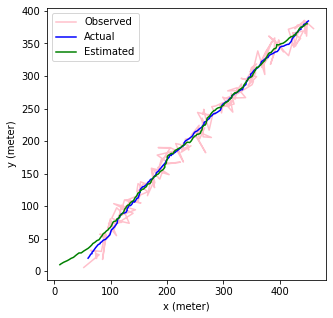

In [23]:
plot_3_continuous(actual_trajectory,observed_trajectory,estimated_trajectory,"Actual","Observed","Estimated")

## **Gaussian 2-D plot**

In [24]:
def f(x, y, mu, sigma):
  det = sigma[0][0]*sigma[1][1] - sigma[0][1]*sigma[1][0]
  inv = np.linalg.inv(sigma)
  return (np.exp(0.5*(-1)*(((x-mu[0][0])**2)*(inv[0][0]) + ((y-mu[1][0])**2)*(inv[1][1]) + (x-mu[0][0])*(y-mu[1][0])*(inv[1][0]+inv[0][1]))))/(math.sqrt(2*math.pi*abs(det)))

In [25]:
def plot_gaussian (mu, sigma):
  """
  function definition
  """

  x = np.linspace(mu[0][0]-20,mu[0][0]+20, 30)
  y = np.linspace(mu[1][0]-20,mu[1][0]+20, 30)

  X, Y = np.meshgrid(x, y)
  Z = f(X, Y, mu, sigma)


  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                  cmap='viridis', edgecolor='none')
  ax.set_title('surface');
  ax.view_init(20, 20)


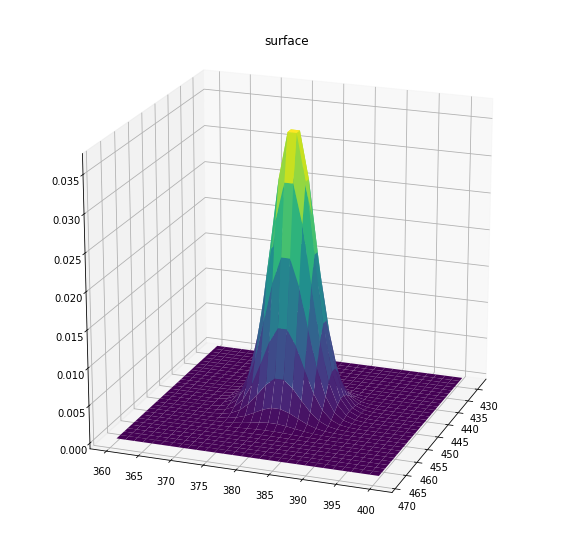

In [26]:
# final belief over the position
plot_gaussian(mu_s[T][:2,:], sigma_s[T][:2,:2])

## **Part d**

In [27]:
cosine_X_init = np.array([60,20,2,2]).reshape(4,1)
cosine_U = np.zeros((T,2,1),float)

In [28]:
angle = 0
delta = (math.pi)/6
for i in range(0,T):
  cosine_U[i][0] = math.sin(angle)
  cosine_U[i][1] = math.cos(angle)
  angle = angle + delta

In [29]:
cosine_actual_trajectory = generate_trajectory(A, B, Q, cosine_X_init, cosine_U, T)
cosine_observed_trajectory = observe_trajectory(C,R,cosine_actual_trajectory,T)

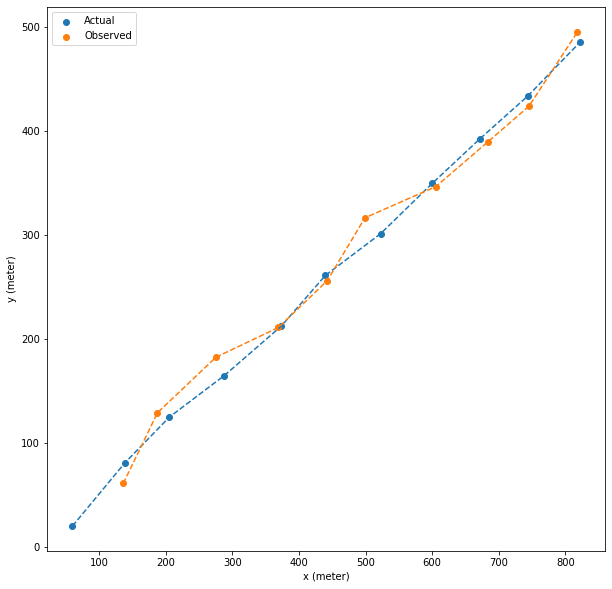

In [30]:
plot_2_trajectory(cosine_actual_trajectory,cosine_observed_trajectory,"Actual","Observed")

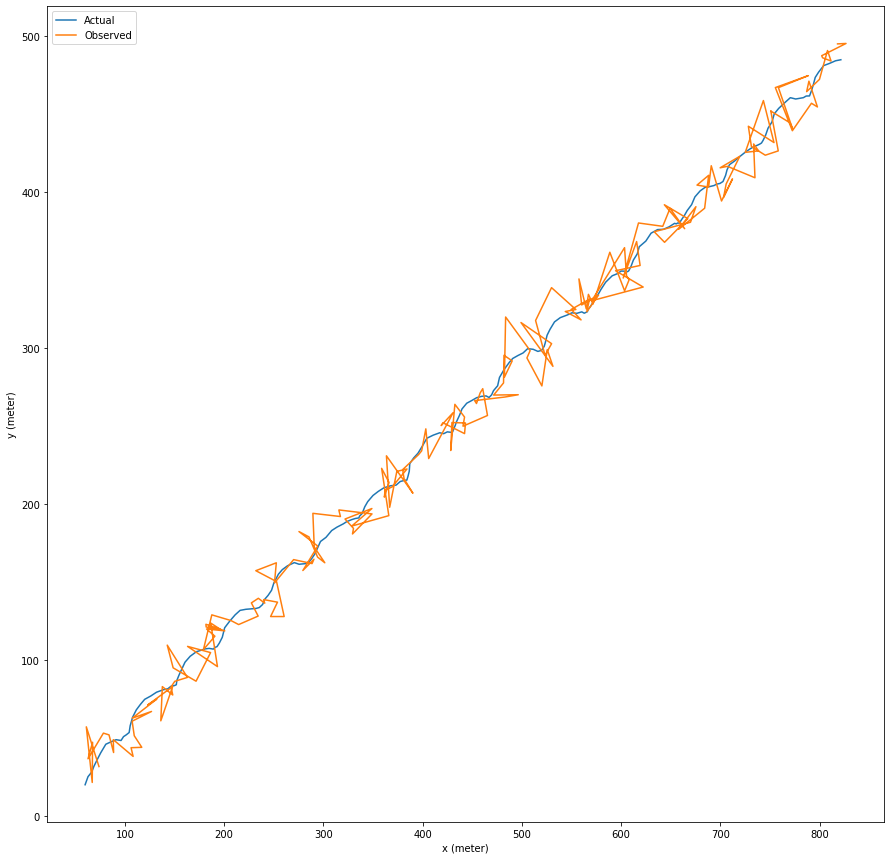

In [31]:
plot_2_continuous(cosine_actual_trajectory,cosine_observed_trajectory,"Actual","Observed")

In [32]:
cosine_mu_belief = np.array([10,10,1,1]).reshape(4,1)
cosine_sigma_belief = np.zeros((4,4),float)
np.fill_diagonal(cosine_sigma_belief, 1e-4)

cosine_mu_s = []
cosine_sigma_s = []

cosine_mu_s.append(cosine_mu_belief)
cosine_sigma_s.append(cosine_sigma_belief)

for i in range(1,T+1):
  Z = np.reshape(np.asarray(cosine_observed_trajectory[i-1]),(2,1))
  cosine_mu_i,cosine_sigma_i = kalman_filter("motion_model",cosine_mu_s[i-1],cosine_sigma_s[i-1],U[i-1],None,A,B,C,R,Q)
  cosine_mu_i,cosine_sigma_i = kalman_filter("sensor_model",cosine_mu_i,cosine_sigma_i,U[i-1],Z,A,B,C,R,Q)
  cosine_mu_s.append(cosine_mu_i)
  cosine_sigma_s.append(cosine_sigma_i)
  

In [33]:
cosine_estimated_trajectory = []
for i in range(0,T+1):
  cosine_estimated_trajectory.append(cosine_mu_s[i].reshape(4,).tolist())

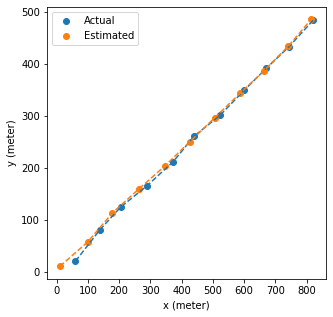

In [34]:
plot_2_trajectory(cosine_actual_trajectory,cosine_estimated_trajectory,"Actual","Estimated")

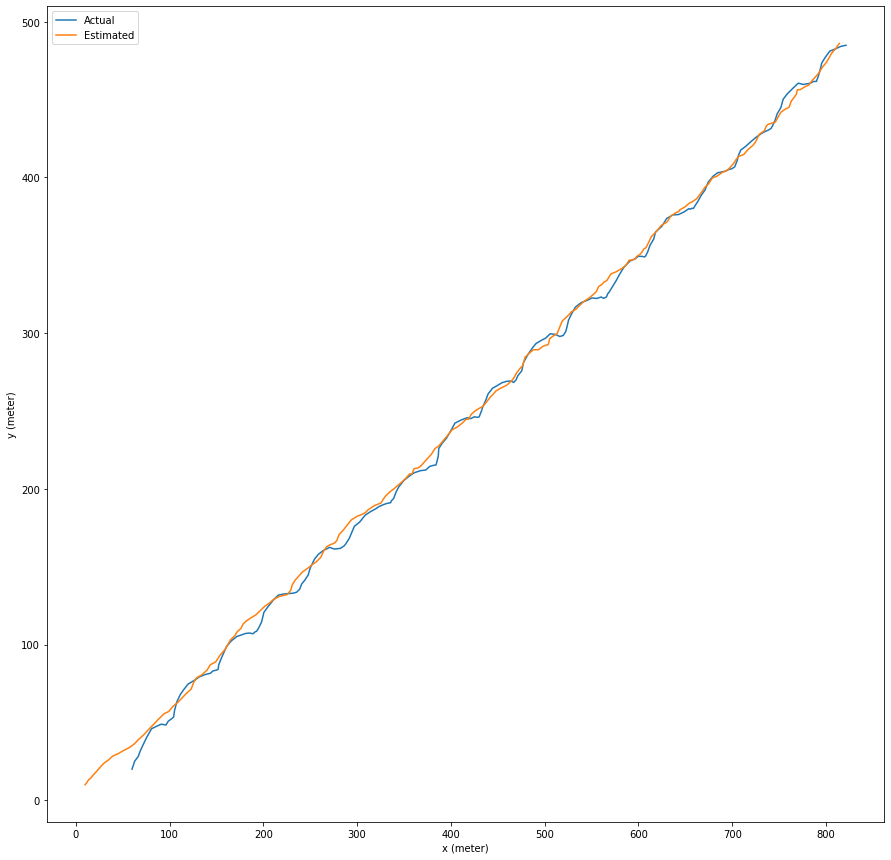

In [35]:
plot_2_continuous(cosine_actual_trajectory,cosine_estimated_trajectory,"Actual","Estimated")

200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


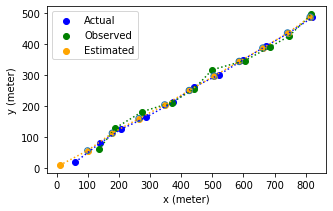

In [36]:
plot_3_trajectory(cosine_actual_trajectory,cosine_observed_trajectory,cosine_estimated_trajectory,cosine_mu_s,cosine_sigma_s)

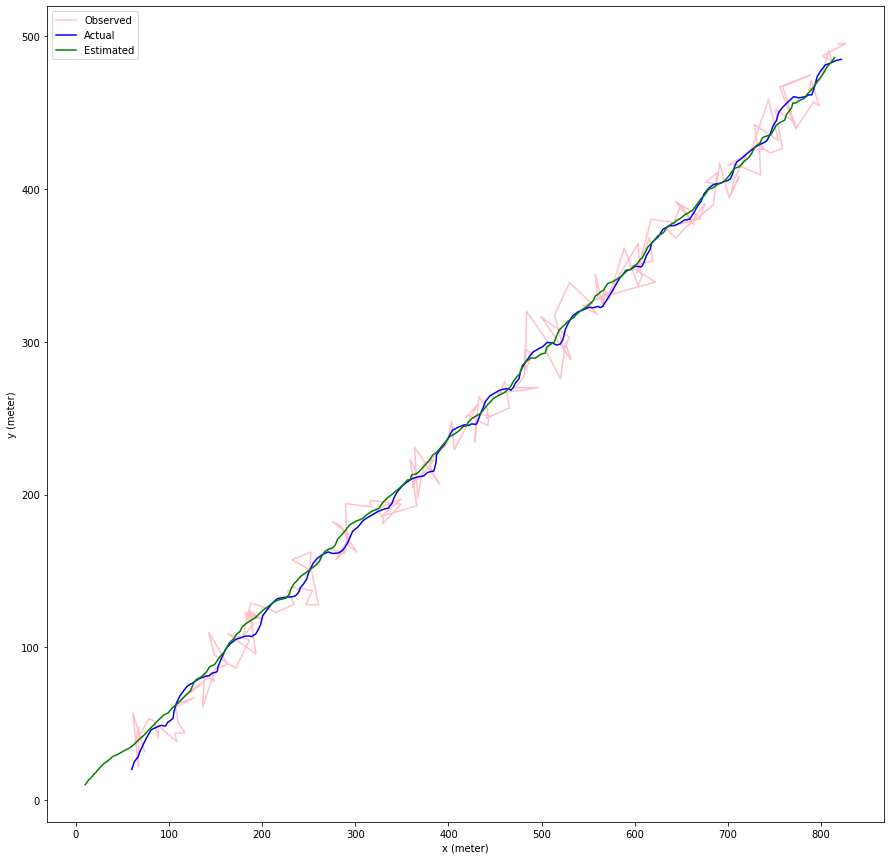

In [37]:
plot_3_continuous(cosine_actual_trajectory,cosine_observed_trajectory,cosine_estimated_trajectory,"Actual","Observed","Estimated")

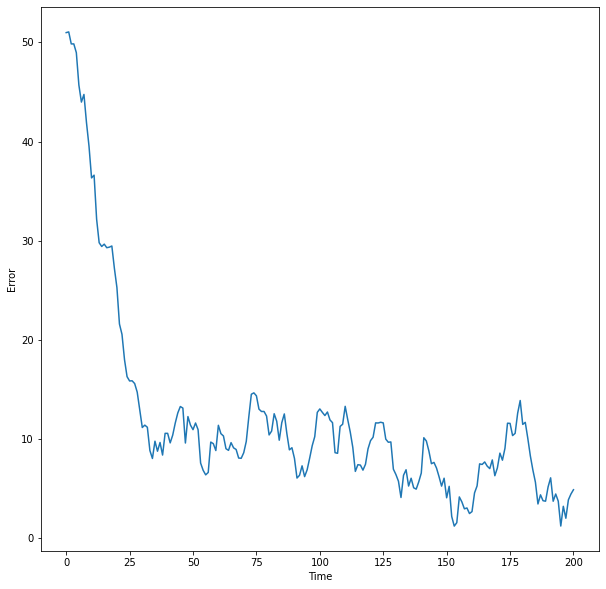

In [38]:
euclidean_plot(actual_trajectory,estimated_trajectory)

## **Part e**

 **Increased sensor variance**

In [39]:
# Variation in sensor variance
#increase in uncertainity
R1 = np.zeros((2, 2),float)
np.fill_diagonal(R1, 1000)
R2 = np.zeros((2, 2),float)
np.fill_diagonal(R2, 10000)

#decrease in uncertainity
R3 = np.zeros((2, 2),float)
np.fill_diagonal(R3, 10)
R4 = np.zeros((2, 2),float)
np.fill_diagonal(R4, 1)

In [40]:
observed_trajectory_1 = observe_trajectory(C, R1, actual_trajectory, T)
observed_trajectory_2 = observe_trajectory(C, R2, actual_trajectory, T)
observed_trajectory_3 = observe_trajectory(C, R3, actual_trajectory, T)
observed_trajectory_4 = observe_trajectory(C, R4, actual_trajectory, T)

In [41]:
mu_belief_1 = np.array([10,10,1,1]).reshape(4,1)
sigma_belief_1 = np.zeros((4,4),float)
np.fill_diagonal(sigma_belief_1, 1e-4)

mu_belief_2 = np.array([10,10,1,1]).reshape(4,1)
sigma_belief_2 = np.zeros((4,4),float)
np.fill_diagonal(sigma_belief_2, 1e-4)

mu_belief_3 = np.array([10,10,1,1]).reshape(4,1)
sigma_belief_3 = np.zeros((4,4),float)
np.fill_diagonal(sigma_belief_3, 1e-4)

mu_belief_4 = np.array([10,10,1,1]).reshape(4,1)
sigma_belief_4 = np.zeros((4,4),float)
np.fill_diagonal(sigma_belief_4, 1e-4)

#-----------------------------------------------------------------------------------------------------

mu_s_1 = []
sigma_s_1 = []

mu_s_2 = []
sigma_s_2 = []

mu_s_3 = []
sigma_s_3 = []

mu_s_4 = []
sigma_s_4 = []

#-----------------------------------------------------------------------------------------------------

mu_s_1.append(mu_belief_1)
sigma_s_1.append(sigma_belief_1)

mu_s_2.append(mu_belief_2)
sigma_s_2.append(sigma_belief_2)

mu_s_3.append(mu_belief_3)
sigma_s_3.append(sigma_belief_3)

mu_s_4.append(mu_belief_4)
sigma_s_4.append(sigma_belief_4)

#-----------------------------------------------------------------------------------------------------

for i in range(1,T+1):

  Z_1 = np.reshape(np.asarray(observed_trajectory_1[i-1]),(2,1))
  Z_2 = np.reshape(np.asarray(observed_trajectory_2[i-1]),(2,1))
  Z_3 = np.reshape(np.asarray(observed_trajectory_3[i-1]),(2,1))
  Z_4 = np.reshape(np.asarray(observed_trajectory_4[i-1]),(2,1))

  mu_i_1,sigma_i_1 = kalman_filter("motion_model",mu_s_1[i-1],sigma_s_1[i-1],U[i-1],None,A,B,C,R1,Q)
  mu_i_1,sigma_i_1 = kalman_filter("sensor_model",mu_i_1,sigma_i_1,U[i-1],Z_1,A,B,C,R1,Q)
  mu_s_1.append(mu_i_1)
  sigma_s_1.append(sigma_i_1)

  mu_i_2,sigma_i_2 = kalman_filter("motion_model",mu_s_2[i-1],sigma_s_2[i-1],U[i-1],None,A,B,C,R2,Q)
  mu_i_2,sigma_i_2 = kalman_filter("sensor_model",mu_i_2,sigma_i_2,U[i-1],Z_2,A,B,C,R2,Q)
  mu_s_2.append(mu_i_2)
  sigma_s_2.append(sigma_i_2)

  mu_i_3,sigma_i_3 = kalman_filter("motion_model",mu_s_3[i-1],sigma_s_3[i-1],U[i-1],None,A,B,C,R3,Q)
  mu_i_3,sigma_i_3 = kalman_filter("sensor_model",mu_i_3,sigma_i_3,U[i-1],Z_3,A,B,C,R3,Q)
  mu_s_3.append(mu_i_3)
  sigma_s_3.append(sigma_i_3)

  mu_i_4,sigma_i_4 = kalman_filter("motion_model",mu_s_4[i-1],sigma_s_4[i-1],U[i-1],None,A,B,C,R4,Q)
  mu_i_4,sigma_i_4 = kalman_filter("sensor_model",mu_i_4,sigma_i_4,U[i-1],Z_4,A,B,C,R4,Q)
  mu_s_4.append(mu_i_4)
  sigma_s_4.append(sigma_i_4)
  

In [42]:
estimated_trajectory_1 = []
estimated_trajectory_2 = []
estimated_trajectory_3 = []
estimated_trajectory_4 = []

for i in range(0,T+1):
  estimated_trajectory_1.append(mu_s_1[i].reshape(4,).tolist())
  estimated_trajectory_2.append(mu_s_2[i].reshape(4,).tolist())
  estimated_trajectory_3.append(mu_s_3[i].reshape(4,).tolist())
  estimated_trajectory_4.append(mu_s_4[i].reshape(4,).tolist())

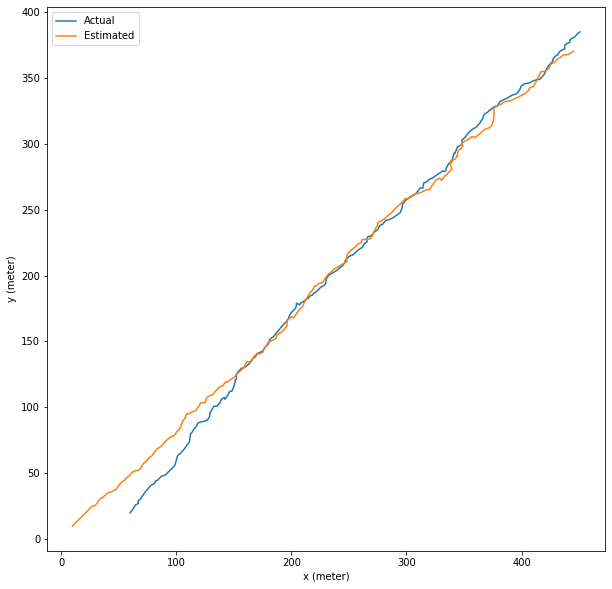

In [43]:
plot_2_continuous(actual_trajectory,estimated_trajectory_1,"Actual","Estimated")

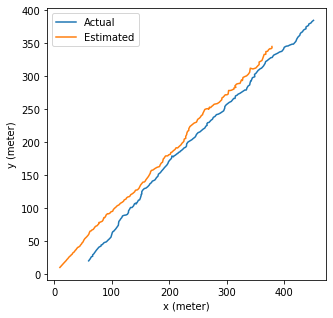

In [44]:
plot_2_continuous(actual_trajectory,estimated_trajectory_2,"Actual","Estimated")

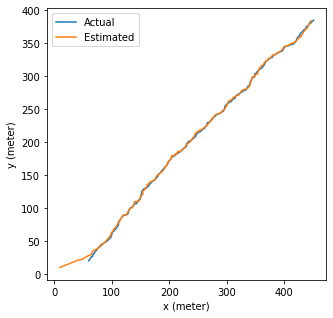

In [45]:
plot_2_continuous(actual_trajectory,estimated_trajectory_3,"Actual","Estimated")

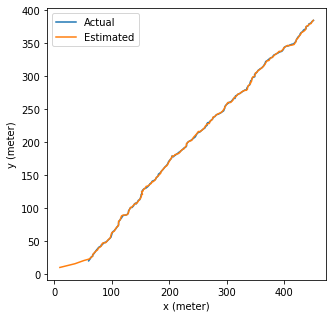

In [46]:
plot_2_continuous(actual_trajectory,estimated_trajectory_4,"Actual","Estimated")

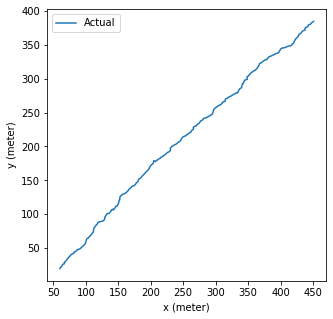

In [47]:
plot_trajectory(actual_trajectory,"Actual")

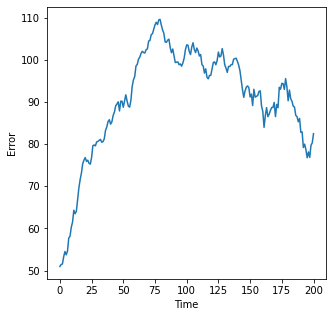

In [48]:
euclidean_plot(actual_trajectory,estimated_trajectory_2)

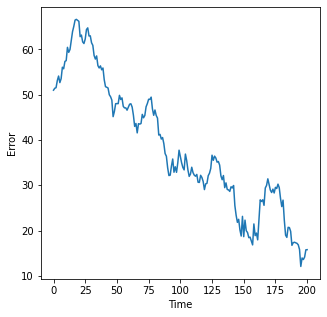

In [49]:
euclidean_plot(actual_trajectory,estimated_trajectory_1)

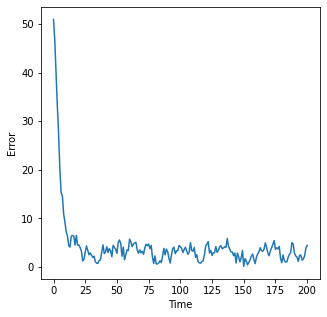

In [50]:
euclidean_plot(actual_trajectory,estimated_trajectory_3)

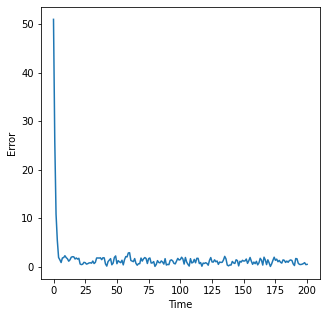

In [51]:
euclidean_plot(actual_trajectory,estimated_trajectory_4)

## **Part f)**

In [52]:
mu_belief_h = np.array([10,10,1,1]).reshape(4,1)
sigma_belief_h = np.zeros((4,4),float)
np.fill_diagonal(sigma_belief_h, 1e-4)
sigma_belief_h[0][0] = 1e4
sigma_belief_h[1][1] = 1e4

mu_s_h = []
sigma_s_h = []

mu_s_h.append(mu_belief_h)
sigma_s_h.append(sigma_belief_h)

for i in range(1,T+1):

  Z = np.reshape(np.asarray(cosine_observed_trajectory[i-1]),(2,1))
  mu_i_h,sigma_i_h = kalman_filter("motion_model",mu_s_h[i-1],sigma_s_h[i-1],cosine_U[i-1],None,A,B,C,R,Q)
  mu_i_h,sigma_i_h = kalman_filter("sensor_model",mu_i_h,sigma_i_h,cosine_U[i-1],Z,A,B,C,R,Q)
  mu_s_h.append(mu_i_h)
  sigma_s_h.append(sigma_i_h)

In [53]:
estimated_trajectory_h = []
for i in range(0,T+1):
  estimated_trajectory_h.append(mu_s_h[i].reshape(4,).tolist())

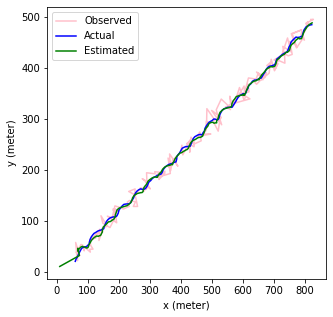

In [54]:
plot_3_continuous(cosine_actual_trajectory, cosine_observed_trajectory, estimated_trajectory_h, "Actual", "Observed", "Estimated")

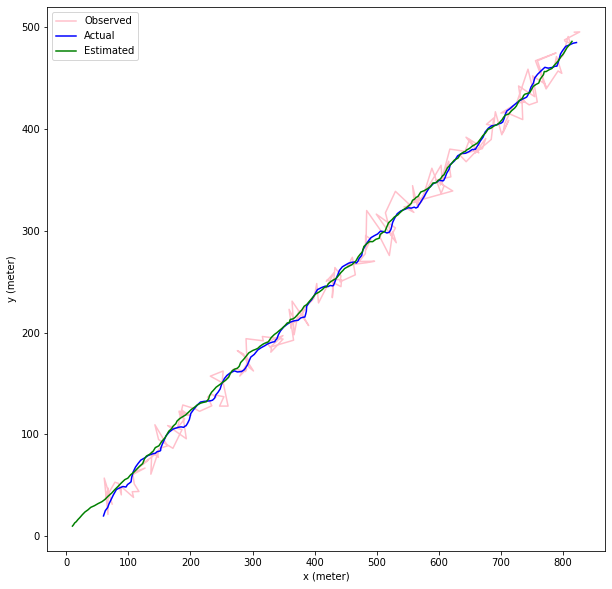

In [55]:
plot_3_continuous(cosine_actual_trajectory, cosine_observed_trajectory, cosine_estimated_trajectory, "Actual", "Observed", "Estimated")

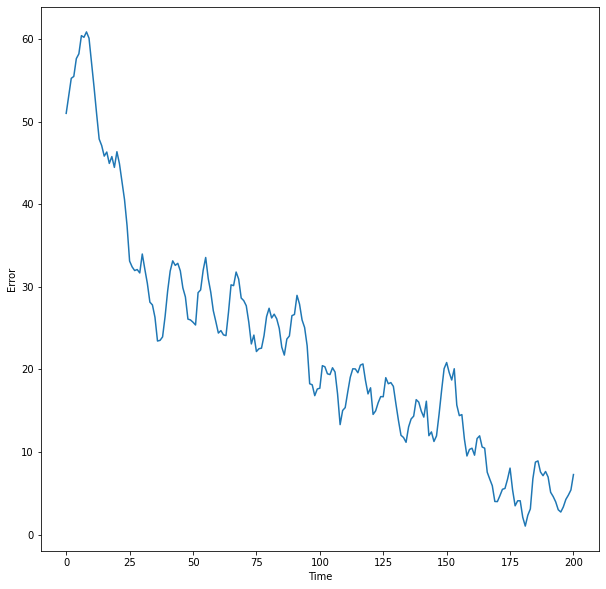

In [56]:
euclidean_plot(cosine_actual_trajectory,cosine_estimated_trajectory)

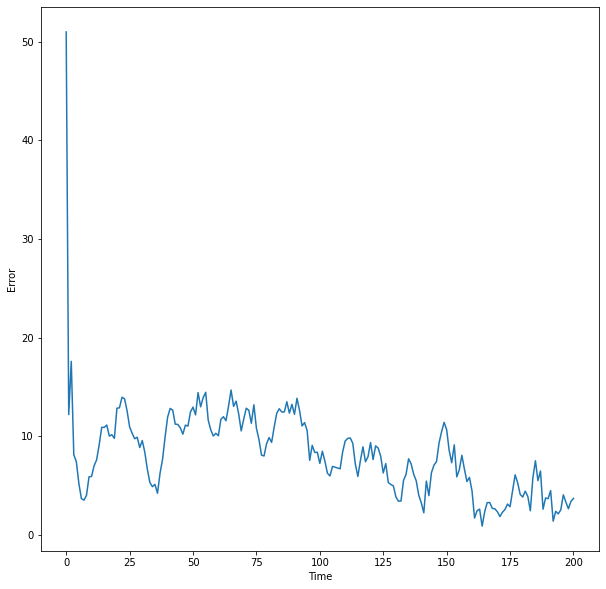

In [57]:
euclidean_plot(cosine_actual_trajectory,estimated_trajectory_h)

## **Part g**

In [58]:
mu_belief_d = np.array([10,10,1,1]).reshape(4,1)
sigma_belief_d = np.zeros((4,4),float)
np.fill_diagonal(sigma_belief_d, 1e-4)

mu_s_d = []
sigma_s_d = []

mu_s_d.append(mu_belief_d)
sigma_s_d.append(sigma_belief_d)

for i in range(1,T+1):

  Z = np.reshape(np.asarray(observed_trajectory[i-1]),(2,1))
  
  mu_i_d,sigma_i_d = kalman_filter("motion_model",mu_s_d[i-1],sigma_s_d[i-1],U[i-1],None,A,B,C,R,Q)

  if (((i>= 10 and i<20) or (i>=30 and i<40)) == False):
    mu_i_d,sigma_i_d = kalman_filter("sensor_model",mu_i_d,sigma_i_d,U[i-1],Z,A,B,C,R,Q)

  mu_s_d.append(mu_i_d)
  sigma_s_d.append(sigma_i_d)

In [59]:
estimated_trajectory_d = []
for i in range(0,T+1):
  estimated_trajectory_d.append(mu_s_d[i].reshape(4,).tolist())

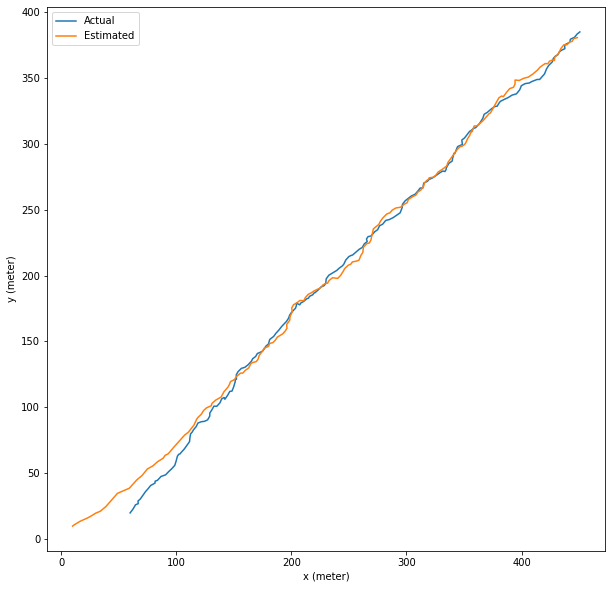

In [60]:
plot_2_continuous(actual_trajectory,estimated_trajectory_d,"Actual","Estimated")

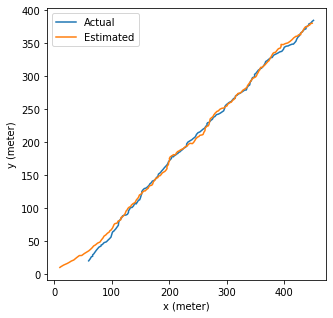

In [61]:
plot_2_continuous(actual_trajectory,estimated_trajectory,"Actual","Estimated")

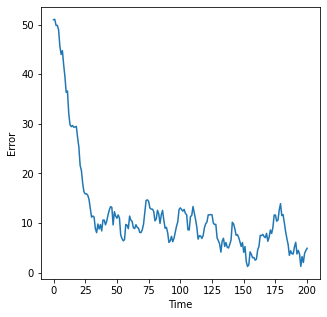

In [62]:
euclidean_plot(actual_trajectory,estimated_trajectory)

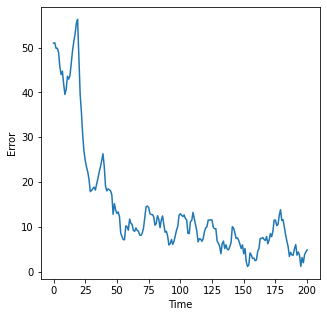

In [63]:
euclidean_plot(actual_trajectory,estimated_trajectory_d)

In [64]:
def uncertainity_ellipse(path,mu_s, sigma_s):
 
  for i in range (0,50,1):

    mean = mu_s[i]
    cov = sigma_s[i]
    cov = cov[:2,:2]

    h = mean[0][0]
    k = mean[1][0]   
    eigval, eigvec  = np.linalg.eig(cov)
    sigma_x = eigval[0]
    sigma_y = eigval[1]
    eigvec_x = eigvec[:,0]
    beta = 90
    if eigvec_x[0] != 0:
      beta = np.degrees((np.arctan(eigvec_x[1]/eigvec_x[0])))
    ellipse = Ellipse((h,k), 2*sigma_x, 2*sigma_y, angle = beta, facecolor='none', edgecolor='tab:blue' )
    ax = plt.subplot(aspect='equal')
    ax.add_patch(ellipse)
  
  x = []
  y = []

  for i in range (0,50,1):
    x.append(path[i][0])
    y.append(path[i][1])

  plt.scatter(x,y,c = 'orange',label = 'Estimated')
  plt.plot(x,y,linestyle = 'dotted',c = 'orange')
  plt.legend()
  plt.rcParams["figure.figsize"] = (15,15)
  plt.xlabel("x (meter)")
  plt.ylabel("y (meter)")
  
  plt.show()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


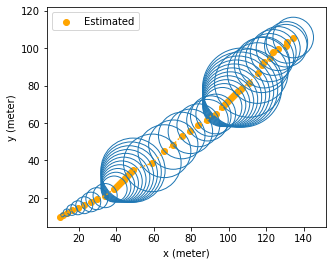

In [65]:
uncertainity_ellipse(estimated_trajectory_d, mu_s_d, sigma_s_d)

## **Part h**

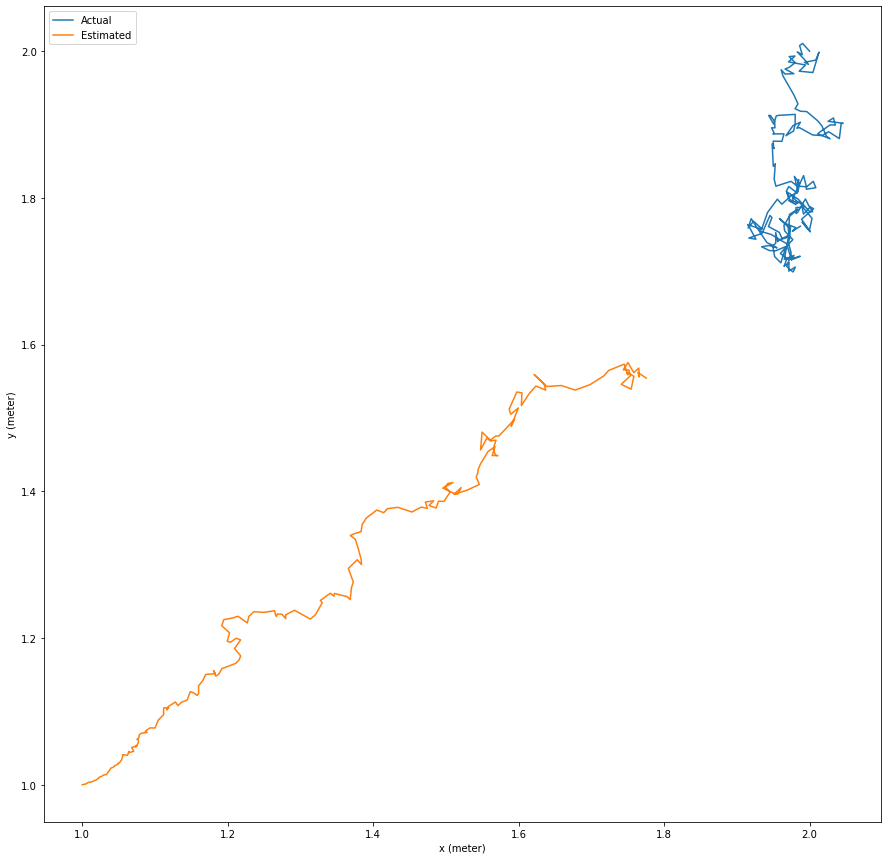

In [66]:
#Part H
plot_2_continuous(np.delete(actual_trajectory,[0,1],1),np.delete(estimated_trajectory,[0,1],1),"Actual","Estimated")

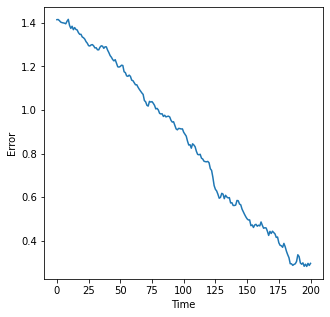

In [67]:
euclidean_plot(np.delete(actual_trajectory,[0,1],1),np.delete(estimated_trajectory,[0,1],1))

## **Part i**

In [68]:
def plot_uncertainity (mean, cov):
  h = mean[0][0]
  k = mean[1][0]
  eigval, eigvec  = np.linalg.eig(cov)
  sigma_x = eigval[0]
  sigma_y = eigval[1]
  eigvec_x = eigvec[:,0]
  beta = 90
  if eigvec_x[0] != 0:
    beta = np.degrees((np.arctan(eigvec_x[1]/eigvec_x[0])))
  ellipse = Ellipse((h,k), 2*sigma_x, 2*sigma_y, angle = beta, facecolor='none', edgecolor='tab:blue', label = r'$1\sigma$' )
  ellipse2 = Ellipse((h,k), 4*sigma_x, 4*sigma_y, angle = beta, facecolor='none', edgecolor='tab:blue', label = r'$2\sigma$', linestyle='--')
  ellipse3 = Ellipse((h,k), 6*sigma_x, 6*sigma_y, angle = beta, facecolor='none', edgecolor='tab:blue', label = r'$3\sigma$', linestyle=':')
  ax = plt.subplot(aspect='equal')
  ax.add_patch(ellipse)
  ax.add_patch(ellipse2)
  ax.add_patch(ellipse3)
  ax.legend()
  # ax.set_xlim([h-3*max(sigma_x,sigma_y),h+3*max(sigma_x,sigma_y)])
  # ax.set_ylim([k-3*max(sigma_x,sigma_y),k+3*max(sigma_x,sigma_y)])
  ax.set_xlim([0,200])
  ax.set_ylim([0,200])
  plt.show()